<a href="https://colab.research.google.com/github/darshiltrivedi/AlexNet-ImageNet_2010-implementation/blob/master/Convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_136 (Activation)  (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_137 (Activation)  (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 12, 12, 256)     

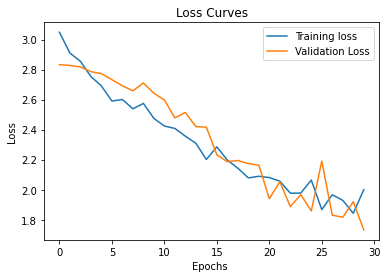

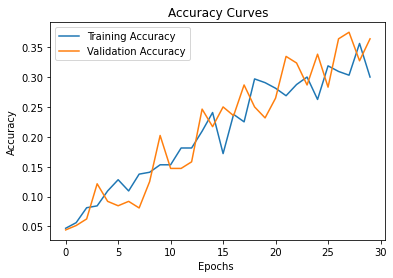

In [0]:
# !pip install tensorflow==1.15  #DataSet that I used is old and is supported by Tensorflow 1.15 or below 
# !pip install tflearn
import numpy as np
np.random.seed(17)
import tensorflow as tf
import keras
from tensorflow.python.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard # for part 3.5 on TensorBoard
from keras import backend as K
from layer import LRN2D

#Custom layer of Local Response Normalization
# Keras Removed LRN because it was not efficient and no more used however I took .py file named it as layer and added to this code


#Importing the data
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True)

#Spliting train and test Dataset
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size=0.2,shuffle = True)


#Data Augmentation

# Horizontal Flip and Brightness used by author added rest to do better data Augmentation
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=[0.2,1.0],
    vertical_flip=True,
    zoom_range=0.2,
    rescale=1./255
    )


# Tried Implementing on MNIST dataset but the size of image was too less

# print(x_train.shape)
# print(y_train.shape)

# x_train = x_train.reshape(-1,224, 242, 3)
# x_test = x_test.reshape(-1,242, 224, 3)

# fashion_mnist = tf.keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


#For programming Basic Arch is that of the paper whereas implementation of making model is similar to that we did in HW4 Q1.
# Architecture of CNN similar to the one used by author in the paper same filter size and number of kernels are used
#Keras used for programming one similar to used in HW4

#Instantiate an empty model

CNN = Sequential()

# 1st Convolutional Layer
CNN.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
CNN.add(Activation('relu'))
# Max Pooling
CNN.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# LNR Normalization
# CNN.add(LRN2D())

#Improvement
#Batch Normalization 
CNN.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))



# 2nd Convolutional Layer
CNN.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
CNN.add(Activation('relu'))
# Max Pooling
CNN.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# LNR Normalization
# CNN.add(LRN2D())

#Improvement
# Batch Normalization
CNN.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))

# 3rd Convolutional Layer
CNN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
CNN.add(Activation('relu'))


# 4th Convolutional Layer
CNN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
CNN.add(Activation('relu'))


# 5th Convolutional Layer
CNN.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
CNN.add(Activation('relu'))

# Max Pooling
CNN.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))


# Passing it to a Fully Connected layer
CNN.add(Flatten())
# 1st Fully Connected Layer
CNN.add(Dense(4096))
CNN.add(Activation('relu'))
# Add Dropout to prevent overfitting
CNN.add(Dropout(0.5))

# 2nd Fully Connected Layer
CNN.add(Dense(4096))
CNN.add(Activation('relu'))
# Add Dropout
CNN.add(Dropout(0.5))

# 3rd Fully Connected Layer
CNN.add(Dense(4096))
CNN.add(Activation('relu'))
CNN.add(Dropout(0.5))

# Output Layer
CNN.add(Dense(17))
CNN.add(Activation('softmax'))

CNN.summary()

# Compile the model
# Changed Compiler from that of Author to get better result

CNN.compile(optimizer='sgd',loss = 'categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top_k_categorical_accuracy", dtype=None)])

batch = 16 #batch size not used by author as used LRN 
epoch = 30 #Actually 100 epochs were used but reduced to 30 to decrease the time
steps = 20
image = CNN.fit_generator(img_gen.flow(X_training*255, Y_training, batch_size = batch), steps_per_epoch = steps, validation_data = (X_testing,Y_testing), epochs = epoch)
scores = CNN.evaluate(X_testing, Y_testing, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))
print("top_5: %.2f%%" % (scores[2]*100))
# print("Top-5 Test Accuracy is ")+ str(val_top_k_categorical_accuracy*100)


# Plotting the Loss Curve and Accuracy Curve
import matplotlib.pyplot as plt
# Loss Curves
plt.plot(image.history['loss'])
plt.plot(image.history['val_loss'])
plt.title('Loss Curves')
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation Loss'])
plt.show()
# Accuracy Curves
plt.plot(image.history['accuracy'])
plt.plot(image.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()
